In [19]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns

diabetes=load_diabetes()

In [20]:
df_x = diabetes.data
df_y = diabetes.target

In [30]:
df_x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [31]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [32]:
X = np.array(df_x)
y = np.array(df_y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.shape[1]

10

In [39]:
W = np.random.rand(10)
b = np.random.rand()

In [40]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

In [41]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [42]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

In [43]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [44]:
LEARNING_RATE = 0.0001

In [46]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5381.0073
Iteration 20 : Loss 5380.9490
Iteration 30 : Loss 5380.8908
Iteration 40 : Loss 5380.8325
Iteration 50 : Loss 5380.7742
Iteration 60 : Loss 5380.7160
Iteration 70 : Loss 5380.6577
Iteration 80 : Loss 5380.5995
Iteration 90 : Loss 5380.5412
Iteration 100 : Loss 5380.4830
Iteration 110 : Loss 5380.4247
Iteration 120 : Loss 5380.3665
Iteration 130 : Loss 5380.3082
Iteration 140 : Loss 5380.2500
Iteration 150 : Loss 5380.1917
Iteration 160 : Loss 5380.1335
Iteration 170 : Loss 5380.0752
Iteration 180 : Loss 5380.0170
Iteration 190 : Loss 5379.9588
Iteration 200 : Loss 5379.9005
Iteration 210 : Loss 5379.8423
Iteration 220 : Loss 5379.7841
Iteration 230 : Loss 5379.7258
Iteration 240 : Loss 5379.6676
Iteration 250 : Loss 5379.6094
Iteration 260 : Loss 5379.5512
Iteration 270 : Loss 5379.4930
Iteration 280 : Loss 5379.4347
Iteration 290 : Loss 5379.3765
Iteration 300 : Loss 5379.3183
Iteration 310 : Loss 5379.2601
Iteration 320 : Loss 5379.2019
Iteration 330 : L

Iteration 3700 : Loss 5359.6283
Iteration 3710 : Loss 5359.5707
Iteration 3720 : Loss 5359.5131
Iteration 3730 : Loss 5359.4555
Iteration 3740 : Loss 5359.3979
Iteration 3750 : Loss 5359.3403
Iteration 3760 : Loss 5359.2827
Iteration 3770 : Loss 5359.2251
Iteration 3780 : Loss 5359.1675
Iteration 3790 : Loss 5359.1099
Iteration 3800 : Loss 5359.0523
Iteration 3810 : Loss 5358.9947
Iteration 3820 : Loss 5358.9371
Iteration 3830 : Loss 5358.8795
Iteration 3840 : Loss 5358.8219
Iteration 3850 : Loss 5358.7644
Iteration 3860 : Loss 5358.7068
Iteration 3870 : Loss 5358.6492
Iteration 3880 : Loss 5358.5916
Iteration 3890 : Loss 5358.5340
Iteration 3900 : Loss 5358.4765
Iteration 3910 : Loss 5358.4189
Iteration 3920 : Loss 5358.3613
Iteration 3930 : Loss 5358.3038
Iteration 3940 : Loss 5358.2462
Iteration 3950 : Loss 5358.1886
Iteration 3960 : Loss 5358.1311
Iteration 3970 : Loss 5358.0735
Iteration 3980 : Loss 5358.0159
Iteration 3990 : Loss 5357.9584
Iteration 4000 : Loss 5357.9008
Iteratio

Iteration 7290 : Loss 5339.0599
Iteration 7300 : Loss 5339.0030
Iteration 7310 : Loss 5338.9460
Iteration 7320 : Loss 5338.8890
Iteration 7330 : Loss 5338.8320
Iteration 7340 : Loss 5338.7751
Iteration 7350 : Loss 5338.7181
Iteration 7360 : Loss 5338.6611
Iteration 7370 : Loss 5338.6042
Iteration 7380 : Loss 5338.5472
Iteration 7390 : Loss 5338.4902
Iteration 7400 : Loss 5338.4333
Iteration 7410 : Loss 5338.3763
Iteration 7420 : Loss 5338.3194
Iteration 7430 : Loss 5338.2624
Iteration 7440 : Loss 5338.2054
Iteration 7450 : Loss 5338.1485
Iteration 7460 : Loss 5338.0915
Iteration 7470 : Loss 5338.0346
Iteration 7480 : Loss 5337.9777
Iteration 7490 : Loss 5337.9207
Iteration 7500 : Loss 5337.8638
Iteration 7510 : Loss 5337.8068
Iteration 7520 : Loss 5337.7499
Iteration 7530 : Loss 5337.6929
Iteration 7540 : Loss 5337.6360
Iteration 7550 : Loss 5337.5791
Iteration 7560 : Loss 5337.5221
Iteration 7570 : Loss 5337.4652
Iteration 7580 : Loss 5337.4083
Iteration 7590 : Loss 5337.3514
Iteratio

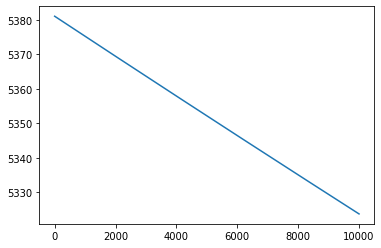

In [47]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [48]:
W, b

(array([ 14.36711473,  -0.3017878 ,  46.03483256,  35.07735439,
         14.25784652,  10.3171711 , -28.23352464,  32.10489607,
         42.05403656,  30.07910907]),
 153.4742447434855)

In [49]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

4658.700027908411

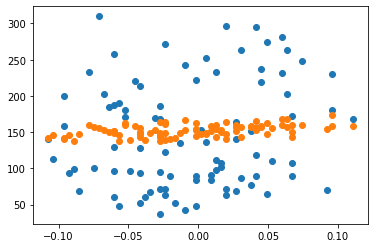

In [50]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()